<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/ML300P3%ED%8C%A8%ED%84%B4%EC%9D%B8%EC%8B%9DC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2. 다양한 패턴의 2차원 상의 점을 구분해 내는 방법

## Step 0. 데이터 소개 및 학습목표

**데이터는 아래와 같은 생성 데이터를 기반으로 합니다.**



- 선형 관계를 가진 클러스터

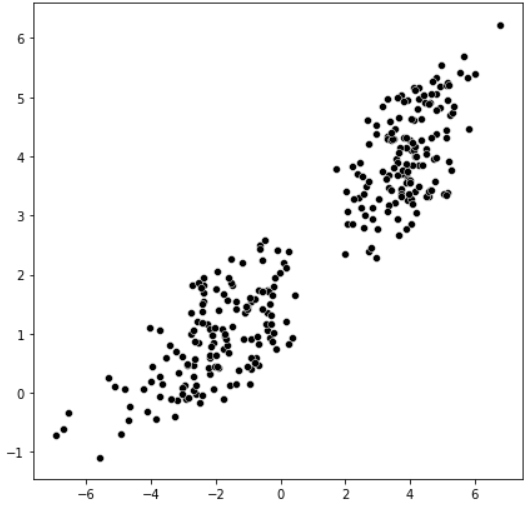

- 비선형 관계를 가진 클러스터
 - Concentric circles
 - Interleaving half circles
 - Spiral


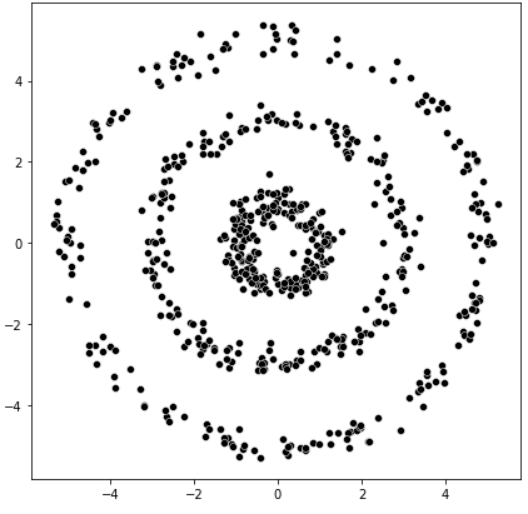

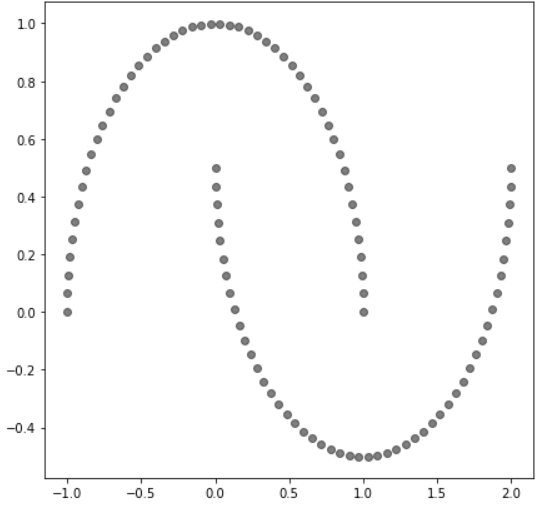

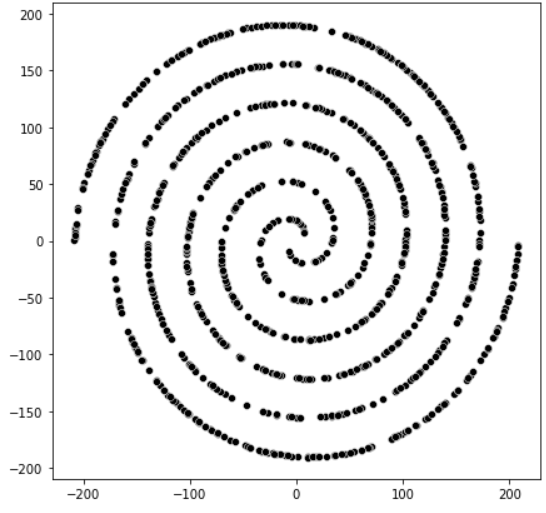

- 아래는 데이터를 생성할 때 가정된 클러스터 정보입니다


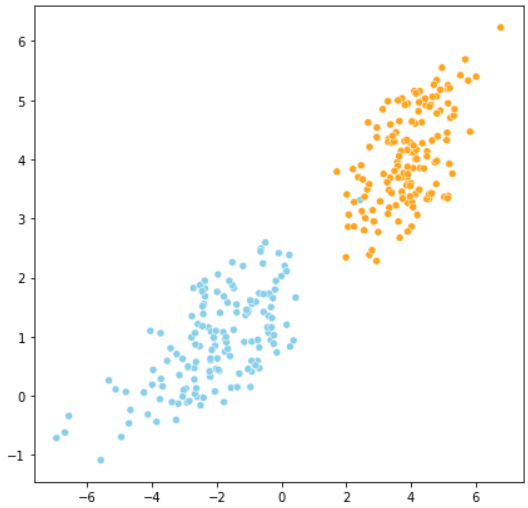

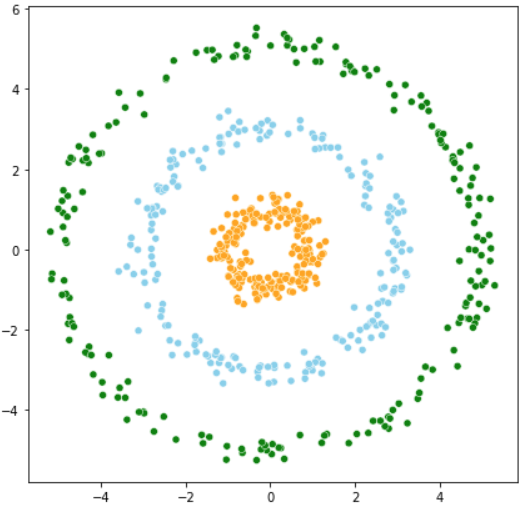

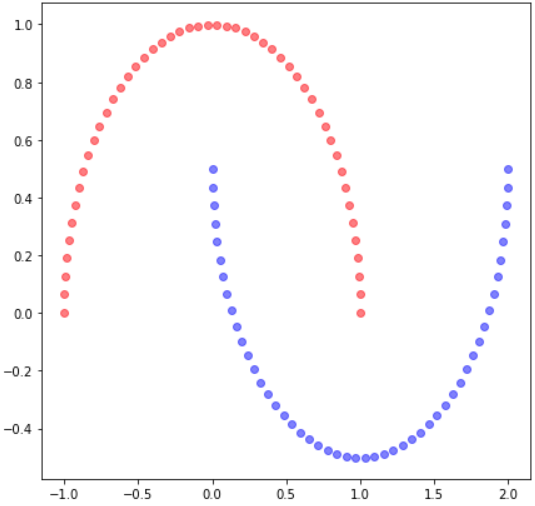

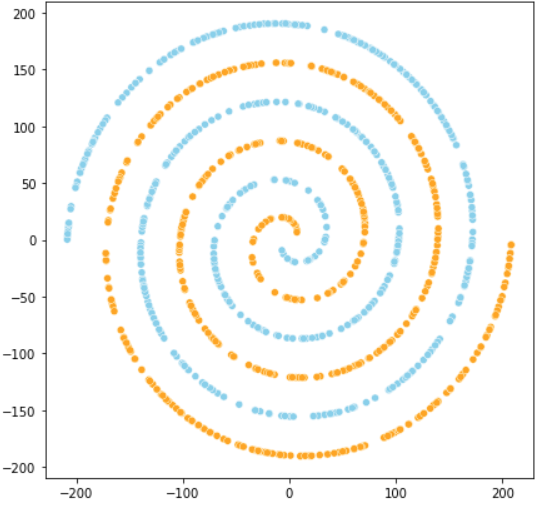

- 설명변수만을 가지고 다양한 데이터의 패턴을 잡아내어 클러스터를 구분해내거나 차원을 축소하는 것이 본 강의의 목적입니다.
- 비지도적 학습방법을 활용하여 데이터 생성시에 가정된 클러스터 정보와 최대한 비슷하게 클러스터를 구분해 내고자 하며, 이를 위하여 Principal Component를 활용합니다.


### **학습목표**
```
- 비지도학습의 개념을 이해.
- Principal Component에 대한 개념과 목적을 이해.
- 선형 패턴과 비선형 패턴의 차이와 이에 따른 접근방법 이해.
- 비선형 패턴 데이터를 다루기 위한 Kernel PCA 이해.
- 분석 상황에서의 Principal Componenet 활용.
``` 

##Step 1. 패턴 데이터 생성

###문제 1. 그림을 바탕으로 데이터 생성하기 - 선형 관계

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles, make_classification

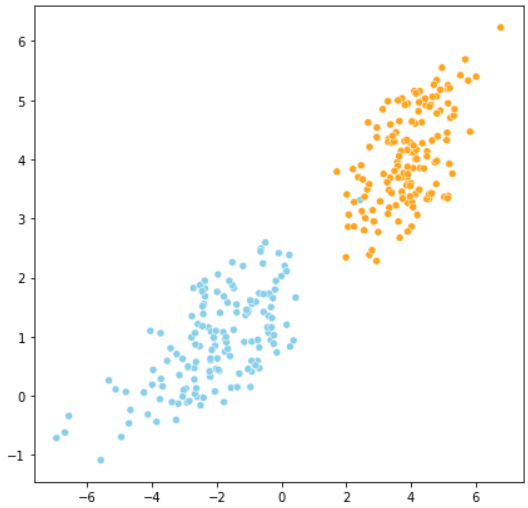

In [21]:
##(문제) sklearn.datasets.make_classification을 활용하여 위의 그림과 같은 데이터를 생성합니다.
# 두 클러스터를 모두 합쳐 관측치의 개수는 300개입니다.
# 두 클러스터가 대부분의 점들이 잘 구분되며 두 클러스터 모두 우상향 하는 모습을 가져야 합니다. 데이터가 정확히 같을 필요는 없습니다.

X_1, y_1 = make_classification(n_samples=300, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1, n_classes=2, class_sep=3)

In [22]:
X_1

array([[-1.79271412,  2.51308491],
       [ 4.11847426,  3.54298133],
       [-3.03476542,  2.91207763],
       [-2.82552573,  3.11942781],
       [-2.78929034,  2.98402641],
       [-4.29200376,  3.42344133],
       [-2.5223934 ,  2.78246612],
       [ 3.73611591,  3.43173652],
       [-4.40198918,  3.36540073],
       [-2.64981268,  2.6302254 ],
       [-3.50982718,  2.92714296],
       [ 3.04497483,  3.09339526],
       [ 4.54143899,  3.75097841],
       [-2.36927445,  2.78898503],
       [-2.49199691,  2.79314259],
       [-0.77479707,  2.37409849],
       [ 2.60212672,  2.84440137],
       [ 3.48705541,  3.23436832],
       [-3.06348437,  2.98018656],
       [ 2.04297661,  2.55324429],
       [-3.07833703,  2.9004247 ],
       [-2.11131876,  2.62912851],
       [ 3.68920179,  3.38307789],
       [ 2.62924036,  2.85927378],
       [ 3.887063  ,  3.39932158],
       [-3.69649101,  3.33675425],
       [ 2.57364051,  2.71005131],
       [-2.8698892 ,  2.90931763],
       [-4.3501362 ,

In [23]:
y_1

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [24]:
X_1[:, 1] = (X_1[:, 0] + X_1[:, 1])/2

In [25]:
X_1

array([[-1.79271412e+00,  3.60185390e-01],
       [ 4.11847426e+00,  3.83072780e+00],
       [-3.03476542e+00, -6.13438966e-02],
       [-2.82552573e+00,  1.46951040e-01],
       [-2.78929034e+00,  9.73680389e-02],
       [-4.29200376e+00, -4.34281212e-01],
       [-2.52239340e+00,  1.30036361e-01],
       [ 3.73611591e+00,  3.58392621e+00],
       [-4.40198918e+00, -5.18294226e-01],
       [-2.64981268e+00, -9.79364404e-03],
       [-3.50982718e+00, -2.91342111e-01],
       [ 3.04497483e+00,  3.06918504e+00],
       [ 4.54143899e+00,  4.14620870e+00],
       [-2.36927445e+00,  2.09855290e-01],
       [-2.49199691e+00,  1.50572836e-01],
       [-7.74797071e-01,  7.99650707e-01],
       [ 2.60212672e+00,  2.72326405e+00],
       [ 3.48705541e+00,  3.36071187e+00],
       [-3.06348437e+00, -4.16489063e-02],
       [ 2.04297661e+00,  2.29811045e+00],
       [-3.07833703e+00, -8.89561661e-02],
       [-2.11131876e+00,  2.58904874e-01],
       [ 3.68920179e+00,  3.53613984e+00],
       [ 2.

In [26]:
rng = np.random.RandomState(2)
X_1 += 2 * rng.uniform(size=X_1.shape)

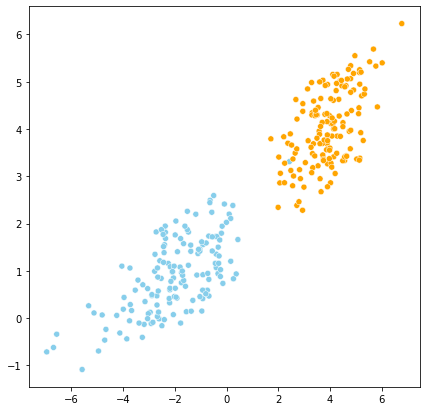

In [27]:
## (문제) seaborn.scatterplot을 이용하고 아래의 color_code와 plot 세팅을 활용하여 플랏을 그립니다.
color_code = {0: 'Orange', 1:'Skyblue'}
plt.figure(figsize=(7, 7))

sns.scatterplot(x=X_1[:,0], y=X_1[:, 1], c=[color_code.get(i) for i in y_1])
plt.show()

### 문제 2. 그림을 바탕으로 데이터 생성하기 - 비선형 관계

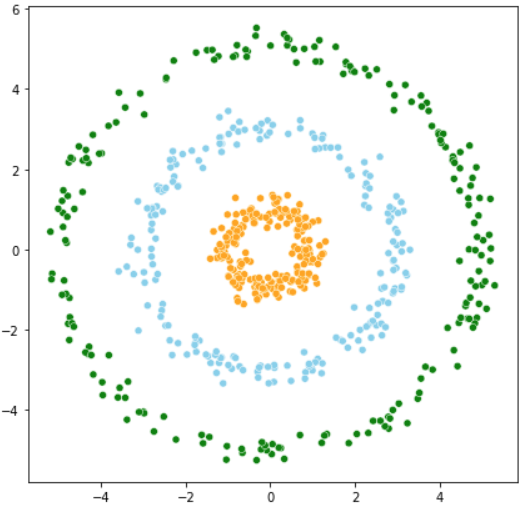

In [28]:
##(문제) (x,y)=(r*cos(theta),r*sin(theta))임을 활용하여 위의 그림과 같은 데이터를 생성합니다.
np.random.seed(1)
def CircleXY(r, n, sigma):
  theta = np.random.uniform(low=0, high=2*np.pi, size=n)
  x_error = np.random.normal(loc=0.0, scale=sigma, size=n)
  y_error = np.random.normal(loc=0.0, scale=sigma, size=n)

  x_val = r*np.cos(theta) + x_error
  y_val = r*np.sin(theta) + y_error
  return x_val, y_val, np.repeat(r, n)

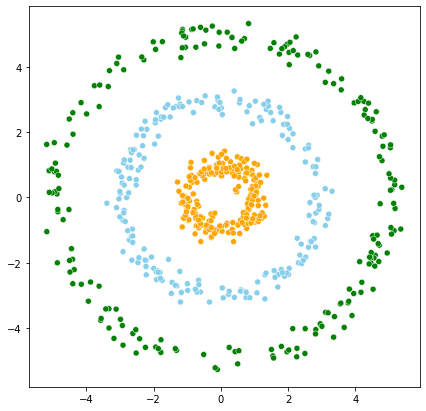

In [29]:
##(문제) seaborn.scatterplot을 이용하고 아래의 파라미터들을 활용하여 Concentric circles 플랏을 완성합니다.
plt.figure(figsize=(7, 7))
n = 200
r_list = [1, 3, 5]
sigma = 0.2
param_lists = [(r, n, sigma) for r in r_list]
coordinates = [ CircleXY(param[0], param[1], param[2]) for param in param_lists]
color_code = {1:'Orange', 3:'Skyblue', 5:'Green'}

for j in range(0, len(coordinates)):
  x, y, group = coordinates[j]
  sns.scatterplot(x = x, y = y, c = [color_code.get(i) for i in group])

plt.show()

In [30]:
coordinates

[(array([-0.85157535, -0.06170214,  1.04649865, -0.1864117 ,  0.54212912,
          0.34939616,  0.59763353, -0.12759788, -0.70863982, -0.99043635,
         -0.90114625, -0.41969262,  0.28577629,  0.49641691,  0.88181162,
         -0.67858286, -0.81826337, -0.9921036 ,  0.7345911 ,  0.28539897,
          0.51072993,  1.02288874,  0.05009823, -0.7337894 ,  0.58386827,
          0.96893524,  1.36626573,  0.92031608,  0.49142091,  0.67566697,
          1.08137008, -0.93709973,  1.10121432, -1.0423269 , -0.61164493,
         -0.3374096 , -0.28783841,  0.76566074,  0.97131586, -0.12256566,
          1.11010407,  0.03662214, -0.13398784,  0.22967896,  1.02900516,
         -0.87298484,  1.22049833, -0.04840748, -0.10331726,  0.35892856,
          1.11306922, -0.34833162,  0.40095901,  0.11136115, -1.07877425,
          1.10911712, -1.00597094,  0.99526485, -1.11304826, -0.66259831,
          0.4701646 , -1.03581869, -0.56610469, -0.46688979,  0.88584694,
         -1.2432078 , -0.29266896, -1.

In [31]:
# 아래와 같이 데이터를 정리합니다.
X1, X2, y_2_bf = [np.append(np.append(coordinates[0][i], coordinates[1][i]),coordinates[2][i]) for i in range(0, 3)]

In [32]:
X1

array([-0.85157535, -0.06170214,  1.04649865, -0.1864117 ,  0.54212912,
        0.34939616,  0.59763353, -0.12759788, -0.70863982, -0.99043635,
       -0.90114625, -0.41969262,  0.28577629,  0.49641691,  0.88181162,
       -0.67858286, -0.81826337, -0.9921036 ,  0.7345911 ,  0.28539897,
        0.51072993,  1.02288874,  0.05009823, -0.7337894 ,  0.58386827,
        0.96893524,  1.36626573,  0.92031608,  0.49142091,  0.67566697,
        1.08137008, -0.93709973,  1.10121432, -1.0423269 , -0.61164493,
       -0.3374096 , -0.28783841,  0.76566074,  0.97131586, -0.12256566,
        1.11010407,  0.03662214, -0.13398784,  0.22967896,  1.02900516,
       -0.87298484,  1.22049833, -0.04840748, -0.10331726,  0.35892856,
        1.11306922, -0.34833162,  0.40095901,  0.11136115, -1.07877425,
        1.10911712, -1.00597094,  0.99526485, -1.11304826, -0.66259831,
        0.4701646 , -1.03581869, -0.56610469, -0.46688979,  0.88584694,
       -1.2432078 , -0.29266896, -1.11293208,  0.69264454, -0.68

In [33]:
X2

array([ 4.64425452e-01, -1.01750332e+00,  9.29514581e-02,  7.11229055e-01,
        9.98894174e-01,  7.32178498e-01,  8.81859028e-01,  9.86173825e-01,
        4.63825592e-01, -3.48926580e-01,  5.17435257e-01, -9.56345689e-01,
        8.69580213e-01, -8.27611227e-01,  5.97343572e-02, -6.89884277e-01,
        1.07858959e-01, -2.89959326e-01,  7.24773283e-01,  1.09286547e+00,
       -8.46585729e-01, -7.54606185e-01,  1.03857113e+00, -8.70194640e-01,
       -6.96535517e-01, -7.08592737e-01,  6.79936745e-01,  1.60327285e-01,
        1.24273640e+00, -5.80131510e-01,  1.00691593e+00,  3.18536677e-01,
       -6.12696645e-01, -6.39208501e-02, -7.63512660e-01,  9.23535149e-01,
       -1.22921775e+00, -9.51515934e-01,  2.38253034e-01, -1.03683485e+00,
       -9.31277567e-02, -1.03502538e+00,  7.94977763e-01, -1.07630339e+00,
        3.18750750e-01,  6.75169131e-01, -6.38331362e-01,  1.05820862e+00,
        7.67587415e-01,  8.87997156e-01, -2.53246100e-01, -7.17564597e-01,
        9.64002889e-01,  

In [34]:
y_2_bf

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [35]:
X_2 = np.c_[X1, X2]

In [36]:
X_2

array([[-0.85157535,  0.46442545],
       [-0.06170214, -1.01750332],
       [ 1.04649865,  0.09295146],
       ...,
       [ 3.34965838, -4.27722376],
       [-2.88382492,  3.90681548],
       [ 3.81844883, -2.80557166]])

In [37]:
mapping_dic = {1:0, 3:1, 5:2}
y_2_bf2 = [mapping_dic.get(i) for i in y_2_bf]
y_2 = np.array(y_2_bf2)

##Step 2. 전통적 clustering을 통한 접근

###문제 3. [K-means] K-means clustering - 기본 모형 생성 (선형 관계) 

- K-means 알고리즘

 (1) 중심점 (X 표시)을 임의로 선정. (그림 a)

 (2) 각 데이터 포인트에 대해 가장 가까운 중심점을 찾고, 해당 군집을 할당. (그림 b)

 (3) 할당된 군집을 기반으로 새로운 중심점을 계산. (그림 c)
 
 (4) 각 클러스터의 할당이 바뀌지 않을 때까지 (2),(3) 반복.

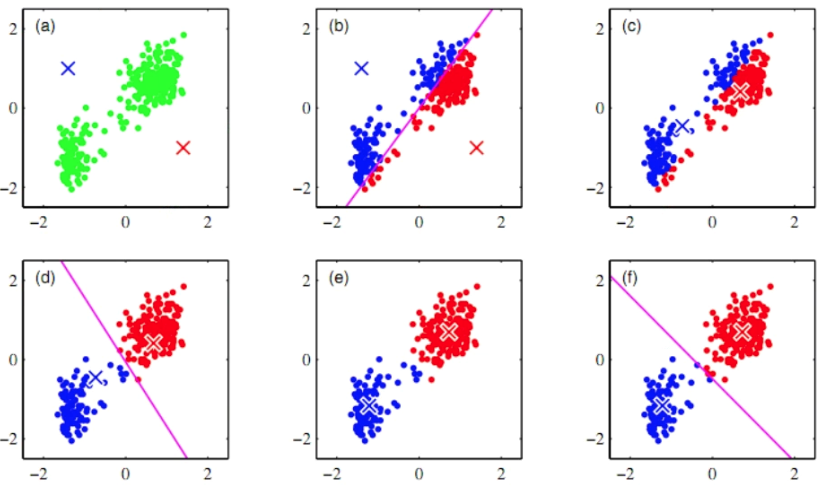

Image reference: Bishop, C. M. (2006). Pattern recognition and machine learning. springer.

In [38]:
from sklearn.cluster import KMeans

In [39]:
## (문제) sklearn.cluster.KMeans를 활용하여 클러스터링을 진행하여 km에 저장합니다. n_clusters = 3, random_state=1 으로 지정합니다.
# centers에 클러스터별 중심값을 저장하고, y_km에  cluster 정보를 저장합니다
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_1)

KMeans(n_clusters=3, random_state=1)

In [40]:
centers = km.cluster_centers_
y_km = km.labels_

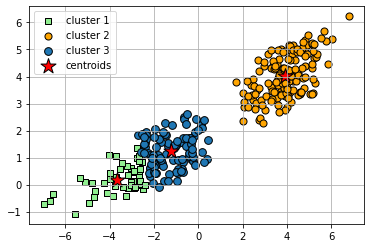

In [42]:
# 아래 코드를 활용해 플랏을 그립니다.
plt.scatter(
    X_1[y_km == 0, 0], X_1[y_km == 0, 1],
    s = 40, c = 'lightgreen',
    marker = 's', edgecolor ='black',
    label = 'cluster 1'
)

plt.scatter(
    X_1[y_km == 1, 0], X_1[y_km == 1, 1],
    s = 50, c = 'orange',
    marker ='o', edgecolor = 'black',
    label = 'cluster 2'
)

plt.scatter(
    X_1[y_km == 2, 0], X_1[y_km == 2, 1],
    s = 60, edgecolor = 'black',
    label = 'cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s = 250, marker ='*',
    c = 'red', edgecolor='black',
    label='centroids'
)

plt.legend(scatterpoints=1)
plt.grid()
plt.show()

###문제 4. [K-means] K-means clustering - 최적의 k 찾기 (선형 관계) 

In [43]:
## (문제) sklearn.cluster.KMeans를 fit한 후 이것의 inertia_를 활용하여 플랏을 그리고 elbow method 를 활용하여 적정 k를 구합니다.
# 고려하는 k는 1에서 10까지로 합니다. KMeans 함수에 random_state=1 옵션을 적용합니다.
distortions = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, random_state=1)
  km.fit(X_1)
  distortions.append(km.inertia_)

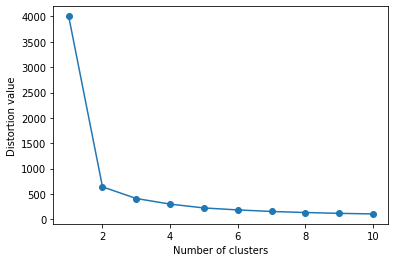

In [44]:
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion value')
plt.show()

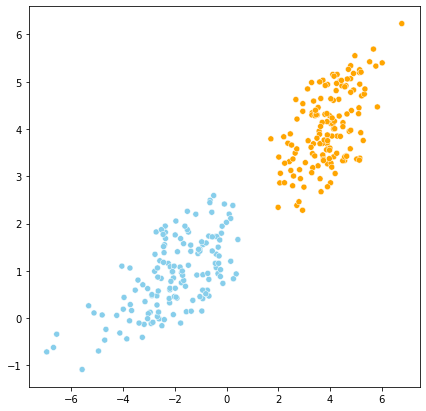

In [45]:
## (문제) seaborn.scatterplot을 이용하고 위의 클러스터링 결과를 활용하여 클러스터별 color_code를 적용하고 플랏을 그립니다.
color_code = {0:'Orange', 1:'Skyblue'}
plt.figure(figsize=(7, 7))

km = KMeans(n_clusters = 2, random_state=1)
km.fit(X_1)
y_km = km.labels_

sns.scatterplot(x=X_1[:,0], y=X_1[:, 1], c= [color_code.get(i) for i in y_km])
plt.show()

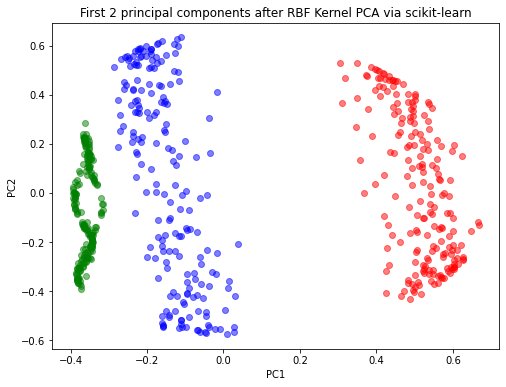

In [46]:
from sklearn.decomposition import KernelPCA
c = 0.08
sigmaval = np.sqrt(c/2)

scikit_kpca = KernelPCA(n_components = 2, kernel ='rbf', gamma = sigmaval)
X_skernpca = scikit_kpca.fit_transform(X_2)

plt.figure(figsize=(8,6))
plt.scatter(X_skernpca[y_2==0, 0], X_skernpca[y_2==0, 1], color ='red', alpha=0.5)
plt.scatter(X_skernpca[y_2==1, 0], X_skernpca[y_2==1, 1], color ='blue', alpha=0.5)
plt.scatter(X_skernpca[y_2==2, 0], X_skernpca[y_2==2, 1], color ='green', alpha=0.5)

plt.title('First 2 principal components after RBF Kernel PCA via scikit-learn')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

##Step 3. Principal Component를 활용한 접근 (선형 관계) 

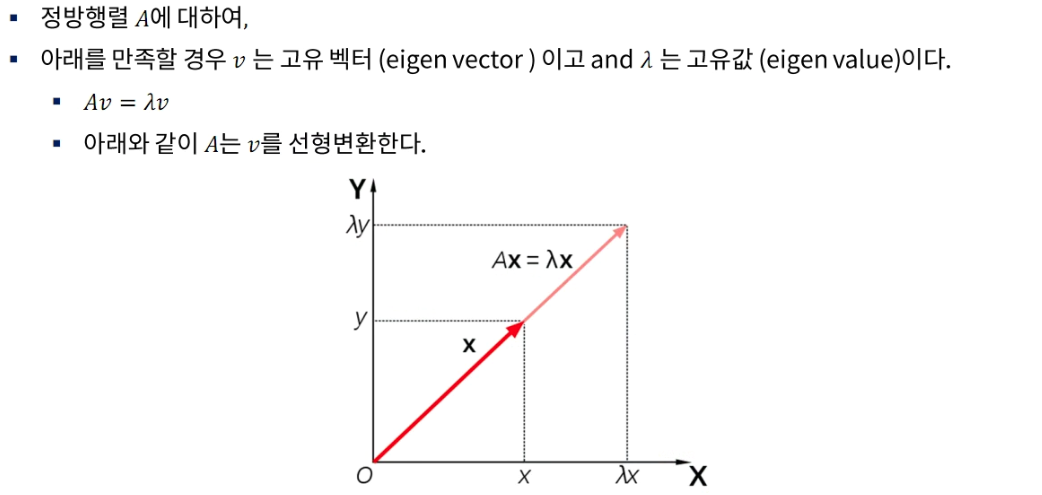

https://upload.wikimedia.org/wikipedia/commons/0/06/Eigenvectors.gif

Image Reference: https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors

  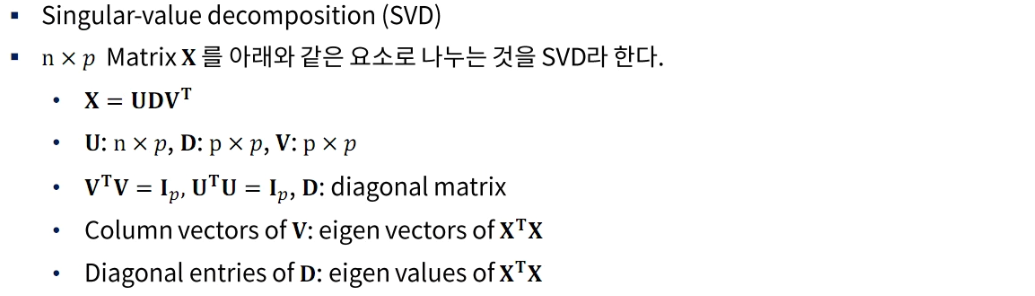

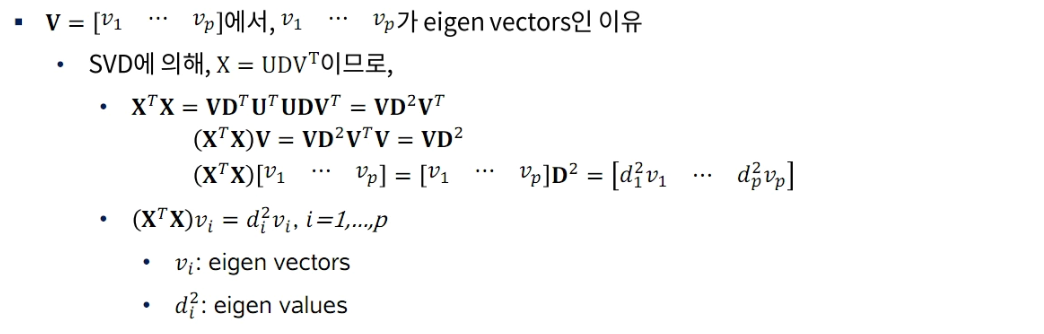

### 문제 5. [PCA] PCA를 위한 Singular Value Decomposition (SVD) 진행 

In [49]:
## (문제) X_1 데이터의 각 변수를 평균이 0이 되도록 만들어 mX에 저장합니다.이렇게 진행하면 mX의 Quadratic 형태가 Covariance와 상수배가 됩니다.
mX = X_1

In [57]:
for i in range(X_1.shape[1]):
  mX[:, i] = mX[:, i] - np.mean(X_1[:, i])

In [59]:
X_1.shape

(300, 2)

In [60]:
## (문제) numpy.cov를 활용하여 mX의 공분산행렬을 구하여 A에 저장합니다.
A = np.cov(mX.transpose())

In [63]:
## (문제) numpy.linalg.svd를 활용하여 SVD를 진행하여 aU, aD, aY에 저장합니다.
aU, aD, aV = np.linalg.svd(A)

In [64]:
## (문제) PC score를 구해내어서 XY에 저장합니다. mX 행렬에 eigenvector를 곱하여 구합니다.
XV = np.dot(mX, aV)

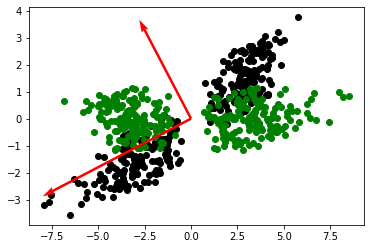

In [66]:
plt.scatter(mX[:, 0], mX[:, 1], color='black')
plt.scatter(XV[:, 0], XV[:, 1], color='green')
origin = (0, 0)
plt.quiver(origin[0], origin[1], aV[0, 0], aV[1,0], color=['r', 'b'], scale=2)
plt.quiver(origin[0], origin[1], aV[0, 1], aV[1, 1], color=['r', 'b'], scale=3)
plt.show()